In [1]:
from fastai import *
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import html
import fastai

In [2]:
# Check that the latest 1.0.0 build of PyTorch has been installed 
# alongside fastai
import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

Cuda available
PyTorch version:  1.0.1.post2


In [3]:
PATH=Path('/home/dell/Code/fastai_examples/pubmed-rct-200k/')
PATH.mkdir(exist_ok=True)
DATA_PATH=Path('/home/dell/Code/fastai_examples/data/pubmed-rct-200k')
DATA_PATH.mkdir(exist_ok=True)

In [4]:
#path = untar_data("http://files.fast.ai/data/examples/imdb_sample.tgz",dest=DATA_PATH)
#path = Path('/home/dell/Code/fastai_examples/data/imdb_sample/')

In [5]:
testData = pd.read_csv(DATA_PATH/'test.txt', sep="\t", header=None, comment='#')
testData.columns = ["label", "text"]
testData.dropna(inplace=True)
testData.head()

,label,text
0,BACKGROUND,Many pathogenic processes and diseases are the...
1,BACKGROUND,It was recently demonstrated that supraphysiol...
2,BACKGROUND,"In the present study , we examined the associa..."
3,BACKGROUND,"In addition , we compared plasma levels of MAp..."
4,METHODS,A total of 192 MI patients and 140 control per...


In [6]:
trainData = pd.read_csv(DATA_PATH/'train.txt', sep="\t", header=None, comment='#')
trainData.columns = ["label", "text"]
trainData.dropna(inplace=True)
trainData.head()

,label,text
0,BACKGROUND,The emergence of HIV as a chronic condition me...
1,BACKGROUND,This paper describes the design and evaluation...
2,METHODS,This study is designed as a randomised control...
3,METHODS,The intervention group will participate in the...
4,METHODS,The program is based on self-efficacy theory a...


In [7]:
#df = pd.read_csv(path/'texts.csv')
#df.head()

In [8]:
dataProcess = False
modelTrain = False

In [9]:
if dataProcess:
  # Language model data
  data_lm = TextLMDataBunch.from_df(PATH,train_df=trainData, valid_df = testData)
  data_lm.save(PATH/'data_lm_export.pkl')
  # Classifier model data
  data_clas = TextClasDataBunch.from_df(PATH, train_df=trainData,valid_df = testData , \
                                        vocab=data_lm.train_ds.vocab, bs=32)
  data_clas.save(PATH/'data_clas_export.pkl')
else:
  data_lm = load_data(PATH, fname='data_lm_export.pkl')
  data_clas = load_data(PATH, fname='data_clas_export.pkl', bs=16)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


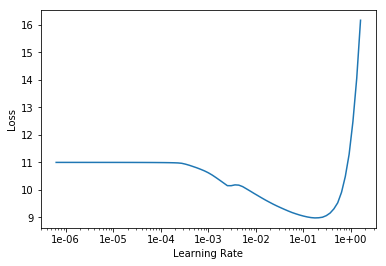

In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn.lr_find()
learn.recorder.plot()

In [11]:
if modelTrain:
    preTrainedWt103Path = Path('/home/dell/Code/fastai_examples/data/models/wt103')
    learn.load_pretrained(wgts_fname = preTrainedWt103Path/'fwd_wt103.h5', itos_fname = preTrainedWt103Path/'itos_wt103.pkl', strict=False )
    #learn.load_encoder(name=preTrainedWt103Path/'fwd_wt103_enc.h5')
    # all layers now trainable
    learn.unfreeze()
    # optionally, separate LR and WD for each group
    learn.fit_one_cycle(1, max_lr=(1e-5, 1e-4, 1e-3, 1e-2), wd=(1e-4,1e-4,1e-4,1e-1))
    
    learn.fit_one_cycle(1, 1e-2)
    learn.freeze()
    pathModel = learn.save(PATH/"trained_model_unfreeze")
    #pathModel = learn.save(PATH/"trained_model")
else:
    learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, pretrained=False)
    learn.load(PATH/"trained_model")

In [12]:
learn.freeze()

In [13]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60003, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60003, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60003, bias=True)
    (output_dp): RNNDropout()
  )
)

In [14]:
learn.model[0][0][2][0]

TypeError: 'AWD_LSTM' object does not support indexing

In [20]:
learn.predict("actin is an important protein ", n_words=50)

'actin is an important protein  in hiv prevention . xxbos Mean arterial blood pressure was similar among study groups . xxbos However , the RESPONSIBILITY inhibitor is an alternative to ROUTINE in first - episode schizophrenia patients . xxbos Tubular aggregometry was performed by HPLC , and we performed'

In [21]:
x_inp = ["i like apples",
         "i want to buy some apples",
         "where is your cell phone",
        "buy me some apples"]

In [22]:
x_inp2 = ["Apple dog Apple dog Apple dog Apple Apple Apple Apple Apple Apple",
         "phone dog phone dog phone dog phone phone dog phone dog phone dog",
         "cat tree cat tree cat tree cat tree cat tree cat tree tree cat cat tree cat"]

In [23]:
x_inp3 = ["cancer",
         "finger",
          "actin",
         "tumor",
         "hand",
         "kras",
         "filament"]

In [24]:
x_inp4 = ["HLA-F",
          #skeleton
         "TFAP2A",
          #immune         
         "KIR2DL4",
          #skeleton
         "CHST11",
           #immune 
         "ARRB2", 
          #skeleton
         "SIX2",
          #immune
         "LGALS9",
          #skeleton
         "TULP3",
          #immune 
         "SERPINB9",
          #skeleton
         "SMAD3",
          #immune 
         "MICA",
          #skeleton
         "GNAS"]

In [25]:
x_inp5 = [
          #skeleton
         "TFAP2A",
          #skeleton
         "GNAS",
          #skeleton
         "CHST11",
          #skeleton
         "SMAD3",
          #skeleton
         "SIX2",
          #skeleton
         "TULP3",
          #immune 
          "HLA-F",
         #immune 
         "ARRB2", 
          #immune
         "LGALS9",
          #immune 
         "SERPINB9",
          #immune 
         "MICA",
          #immune         
         "KIR2DL4"
]

In [26]:
x_inp6 = ["there is no comparison here. you are comparing apples to oranges",
         "i compared the prices of apples and oranges at walmart and kroger stores",
         "i don't see anything common between these two categories."]

Elemanların sırası değişince cos_sim de değişiyor !!!

In [27]:
x_inp7 = ["king",
         "woman",
          "man",
         "queen"
         ]

In [28]:
inputs = x_inp7

In [29]:
import multiprocessing
n_cpu = multiprocessing.cpu_count()

In [30]:
tok = Tokenizer().process_all(partition_by_cores(inputs,n_cpu-1))
tok

[['[', "'", 'king', "'", ']'],
 ['[', "'", 'woman', "'", ']'],
 ['[', "'", 'man', "'", ']'],
 ['[', "'", 'queen', "'", ']']]

In [31]:
import re 

filteredTokens = []
for tokenizedWord in tok:
    filteredToken = [token for token in tokenizedWord if not re.search('xx',token)]
    filteredTokens.append(filteredToken)
filteredTokens

[['[', "'", 'king', "'", ']'],
 ['[', "'", 'woman', "'", ']'],
 ['[', "'", 'man', "'", ']'],
 ['[', "'", 'queen', "'", ']']]

In [32]:
X = [[data_lm.vocab.stoi[o1] for o1 in o ] for o in filteredTokens]; X 

[[95, 265, 10431, 265, 97],
 [95, 265, 4586, 265, 97],
 [95, 265, 6805, 265, 97],
 [95, 265, 22585, 265, 97]]

In [33]:
X = [element for element in X if element[2] != 0 ]; X

[[95, 265, 10431, 265, 97],
 [95, 265, 4586, 265, 97],
 [95, 265, 6805, 265, 97],
 [95, 265, 22585, 265, 97]]

In [34]:
m = learn.model

In [35]:
X[0][2:-2]

[10431]

In [36]:
#inputs = []
embeddings = []    
for sentence in X:
    #resizeLength = len(x_inp4)
    sentenceTrimmed= sentence[2:-2]
    resizeLength = len(sentenceTrimmed)
    inputSentence = tensor(sentenceTrimmed).resize_(resizeLength,1)
    # sentence encoding 400 dims. -1 is the last element that's supposed to have the final encoded state
    tmpEmbded = m[0](inputSentence.cuda())
    embeddings.append(tmpEmbded[0][2][0][-1])

In [37]:
# cosine similarity - to check quality of our sentence encoder
def cos_sim(v1,v2):
    return F.cosine_similarity(v1.unsqueeze(0),v2.unsqueeze(0)).mean()

In [38]:
inputs

['king', 'woman', 'man', 'queen']

In [39]:
i=0
for embedding1 in embeddings:
    j=0
    for embedding2 in embeddings:
        #corr = data_lm.vocab.itos[X[i][2]] + " with " + data_lm.vocab.itos[X[j][2]]
        corr = inputs[i] + " with " + inputs[j]
        print(corr)
        print(cos_sim(embedding1,embedding2).item())
        j+=1
    i+=1

king with king
1.0000001192092896
king with woman
0.5919778943061829
king with man
0.5772840976715088
king with queen
0.5018417239189148
woman with king
0.5919778943061829
woman with woman
1.0
woman with man
0.8415045142173767
woman with queen
0.4319063723087311
man with king
0.5772840976715088
man with woman
0.8415045142173767
man with man
1.0000001192092896
man with queen
0.47111737728118896
queen with king
0.5018417239189148
queen with woman
0.4319063723087311
queen with man
0.47111737728118896
queen with queen
1.000000238418579


king with king
1.0
king with queen
0.8165188431739807
king with man
0.7117255330085754
king with woman
0.6742797493934631
queen with king
0.8165188431739807
queen with queen
0.9999999403953552
queen with man
0.8113273978233337
queen with woman
0.7203792929649353
man with king
0.7117255330085754
man with queen
0.8113273978233337
man with man
1.0000001192092896
man with woman
0.9140985608100891
woman with king
0.6742797493934631
woman with queen
0.7203792929649353
woman with man
0.9140985608100891
woman with woman
0.9999999403953552